In [2]:
### collecting data from pc


import sys
import os
import matplotlib.pyplot as plt

import cv2

import random
import numpy as np

path  = "D:\projectwork\Traffic signs\myData"  
labelsFile = "D:\projectwork\Traffic signs\labels.csv"
imageDimensions = (32,32,3)

count = 0 
images = []  #features
classno = []  #labels
Label_list = os.listdir(path)
print("Total Classes detected :",len(Label_list))

num_of_classes = len(Label_list)
print("Importing all classes......")
print(" ")

for count in range(num_of_classes):
    img_list_per_class = os.listdir(path+"/"+str(count))
    for y in img_list_per_class:
        clrImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(clrImg)
        classno.append(count)
    #print(len(images))
    #print(count, end=" ")  #cursor doesnt go to new
    print("Importing class "+str(count))
    print("no of images in class "+str(count)+" are "+str(len(img_list_per_class)))
    count = count+1
    
print('total data set')
images = np.array(images)
classno = np.array(classno)


Total Classes detected : 43
Importing all classes......
 
Importing class 0
no of images in class 0 are 180
Importing class 1
no of images in class 1 are 1980
Importing class 2
no of images in class 2 are 2010
Importing class 3
no of images in class 3 are 1260
Importing class 4
no of images in class 4 are 1770
Importing class 5
no of images in class 5 are 1650
Importing class 6
no of images in class 6 are 360
Importing class 7
no of images in class 7 are 1290
Importing class 8
no of images in class 8 are 1260
Importing class 9
no of images in class 9 are 1320
Importing class 10
no of images in class 10 are 1800
Importing class 11
no of images in class 11 are 1170
Importing class 12
no of images in class 12 are 1890
Importing class 13
no of images in class 13 are 1920
Importing class 14
no of images in class 14 are 690
Importing class 15
no of images in class 15 are 540
Importing class 16
no of images in class 16 are 360
Importing class 17
no of images in class 17 are 990
Importing clas

In [3]:
#####  TO SLPIT THE DATA INTO REQUIRED TRAIN AND TEST DATA

# to split the whole data
# 80 percent of data used as
import pandas as pd

from sklearn.model_selection import train_test_split
testRatio = 0.2  
validationRatio = 0.2

X_train, X_test, y_train, y_test = train_test_split(images,  classno, test_size = testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(images,  classno, test_size = validationRatio)

### X_train is the array of data that we are training our model on
### Validation data to check the accuracy improvement in each epoch
### Test data to test the model with overall accuracy

print ("Data information")
print("Training data set ", end = "");print(X_train.shape, y_train.shape)
print("validation data set ", end = "");print(X_validation.shape, y_validation.shape)
print("Test", end = "");print(X_test.shape, y_test.shape)

label_data = pd.read_csv(labelsFile)
print("Data Shape from labels file", label_data.shape)


Data information
Training data set (27839, 32, 32, 3) (27839,)
validation data set (6960, 32, 32, 3) (6960,)
Test(6960, 32, 32, 3) (6960,)
Data Shape from labels file (43, 2)


In [4]:
#### to check if number of images matches to number of labels in each data set

### to check all conditions so that there wont be any errors because of data set images

assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimensions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimensions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimensions))," The dimesionas of the Test images are wrong"

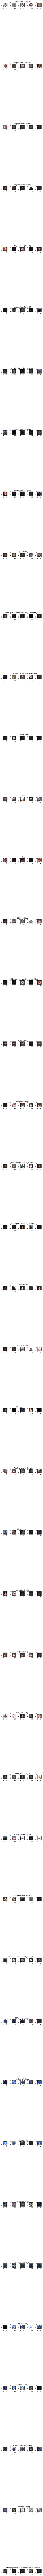

In [5]:
num_of_samples = []
cols = 5
num_classes = num_of_classes
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in label_data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
    
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

In [3]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title(" Distribution of Training Data Set")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show

[]


NameError: name 'plt' is not defined

In [6]:
#   preprocessing of images into required sizes


from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import matplotlib.pyplot 

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)])
print(X_train.shape)


(27839, 32, 32)


In [7]:
####  PREPROCESSING OF DATA



In [8]:
###

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print(X_train.shape)

from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_of_classes)
y_validation = to_categorical(y_validation, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)

(27839, 32, 32, 1)


In [9]:
#### ADUMENTATION OF IMAGES : TO MAKE VARIATIONS OF DATA SET BEFORE TRAINING

data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,zoom_range=0.2, shear_range=0.1,rotation_range=10)

data_generator.fit(X_train)
batches = data_generator.flow(X_train,y_train, batch_size=20)
X_batch,y_batch = next(batches)


In [10]:
### Variables that can be changed based on the dataset size

batch_size = 50
steps_per_epoch = 200
epochs = 30
num_of_filters = 60
size_of_filter1 = (5,5)
size_of_filter2 = (3,3)    
size_of_pool = (2,2)
no_of_nodes = 500

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D


def CNNmodel():
    # variables that canbe changed according to the dataset size
    
    model = Sequential()
    model.add((Conv2D(num_of_filters, size_of_filter1, input_shape=(imageDimensions[0],imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(num_of_filters, size_of_filter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
    model.add((Conv2D(num_of_filters//2, size_of_filter2, activation='relu')))
    model.add((Conv2D(num_of_filters// 2, size_of_filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_of_nodes,activation='relu'))
    model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    model.add(Dense(num_of_classes,activation='softmax')) # OUTPUT LAYER
    # COMPILE MODEL
    model.compile(optimizer = 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model
    


In [12]:
### training data using training data set

mymodel = CNNmodel()
print(mymodel.summary())
history = mymodel.fit_generator(data_generator.flow(X_train,y_train,batch_size=batch_size),steps_per_epoch=steps_per_epoch,epochs=epochs,validation_data=(X_validation,y_validation),shuffle=1)
mymodel.save("CNN_TRAFFIC_SIGNALS")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

C:\Users\kpadm\AppData\Local\Temp\ipykernel_9840\1321472150.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mymodel.fit_generator(data_generator.flow(X_train,y_train,batch_size=batch_size),steps_per_epoch=steps_per_epoch,epochs=epochs,validation_data=(X_validation,y_validation),shuffle=1)


Epoch 1/30
200/200 [==============================] - 69s 335ms/step - loss: 3.0853 - accuracy: 0.1697 - val_loss: 1.7477 - val_accuracy: 0.4816
Epoch 2/30
200/200 [==============================] - 65s 324ms/step - loss: 1.9301 - accuracy: 0.4336 - val_loss: 0.8656 - val_accuracy: 0.7572
Epoch 3/30
200/200 [==============================] - 61s 304ms/step - loss: 1.4227 - accuracy: 0.5688 - val_loss: 0.6309 - val_accuracy: 0.8246
Epoch 4/30
200/200 [==============================] - 62s 309ms/step - loss: 1.1151 - accuracy: 0.6596 - val_loss: 0.4370 - val_accuracy: 0.8710
Epoch 5/30
200/200 [==============================] - 63s 315ms/step - loss: 0.8969 - accuracy: 0.7218 - val_loss: 0.2513 - val_accuracy: 0.9233
Epoch 6/30
200/200 [==============================] - 65s 326ms/step - loss: 0.7602 - accuracy: 0.7660 - val_loss: 0.1694 - val_accuracy: 0.9504
Epoch 7/30
200/200 [==============================] - 63s 314ms/step - loss: 0.6651 - accuracy: 0.7933 - val_loss: 0.1567 - val_ac

INFO:tensorflow:Assets written to: CNN_TRAFFIC_SIGNALS\assets


INFO:tensorflow:Assets written to: CNN_TRAFFIC_SIGNALS\assets


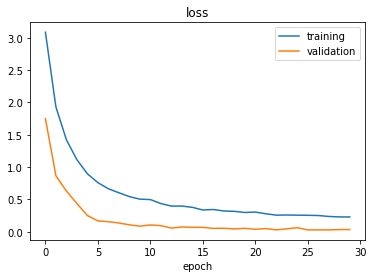

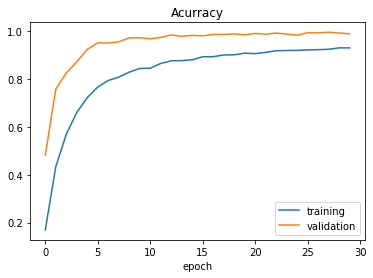

Test Score: 0.035183753818273544
Test Accuracy: 0.9889367818832397


In [13]:
### to plot the output things

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =mymodel.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
